# Project on MNIST dataset - Creating a 3 layer Feed Forward Neural Network to recognize hand written digits

# Load the MNIST dataset

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


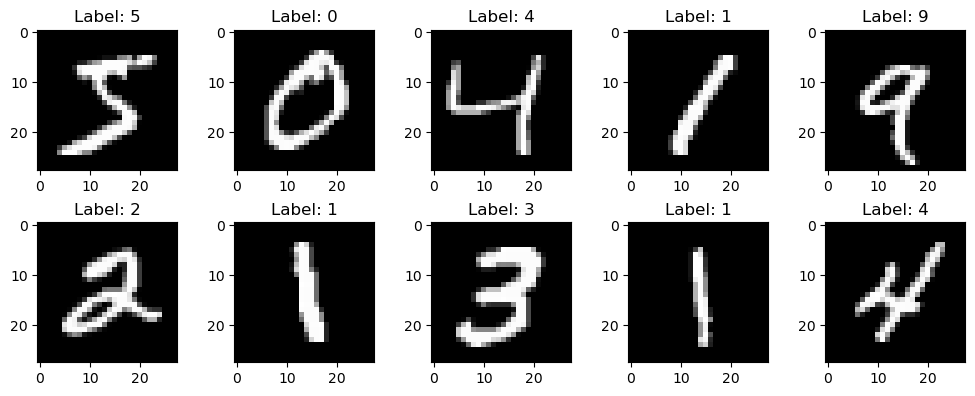

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Explore the dataset
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

# Display example images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")

plt.tight_layout()
plt.show()


# Prepearing the data

In [3]:
# Normalize the input images
x_train = X_train / 255.0
x_test = X_test / 255.0

# Implementing NN model

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 [==============================] - 10s 5ms/step - loss: 0.2584 - accuracy: 0.9231 - val_loss: 0.1068 - val_accuracy: 0.9715
Epoch 2/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1077 - accuracy: 0.9674 - val_loss: 0.0815 - val_accuracy: 0.9762
Epoch 3/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0737 - accuracy: 0.9769 - val_loss: 0.0891 - val_accuracy: 0.9747
Epoch 4/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0576 - accuracy: 0.9813 - val_loss: 0.0708 - val_accuracy: 0.9790
Epoch 5/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0440 - accuracy: 0.9856 - val_loss: 0.0784 - val_accuracy: 0.9777


# Making predictions using NN

In [5]:
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 [==============================] - 1s 3ms/step


# Measuing the model's performance

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For accuracy measurement
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# For confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(confusion_matrix)

# For classification report
classification_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(classification_report)

Accuracy: 0.9762
Confusion Matrix:
[[ 967    1    1    3    1    2    1    1    2    1]
 [   0 1128    3    1    0    1    2    0    0    0]
 [   2    4 1008    4    3    0    1    8    2    0]
 [   0    0    4  984    0    2    0    5   10    5]
 [   0    1    2    0  963    0    2    2    1   11]
 [   2    0    0   24    2  851    5    1    6    1]
 [   3    4    1    1    4    2  939    0    3    1]
 [   0    6    9    2    1    0    0 1003    2    5]
 [   1    0    3    5    4    1    1    6  948    5]
 [   2    4    0    5   14    3    0    9    1  971]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.95      0.97       892
           6       0.99      0.9

# Plot a random example from the test set with its predicted value


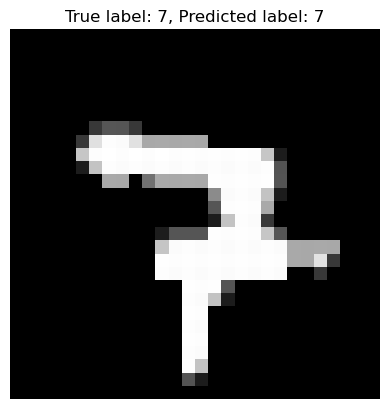

In [7]:
# Plot a random example from the test set with its predicted value
random_idx = np.random.randint(0, len(x_test))
image = x_test[random_idx]
true_label = y_test[random_idx]
predicted_label = y_pred_classes[random_idx]

plt.imshow(image, cmap='gray')
plt.title(f'True label: {true_label}, Predicted label: {predicted_label}')
plt.axis('off')
plt.show()
